# 互评作业1: 数据探索性分析与数据预处理## 一、movies_dataset 数据集
### 1、数据说明
#### 20548行数据，14个属性


In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import re
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pandas import DataFrame
import numpy as np
from collections import Counter

In [2]:
data = pd.read_csv('movies_dataset.csv', index_col=0)
features = data.columns
print('数据属性个数：', len(data.columns))
print('实例总数：', len(data))
print('数据示例：\n', data.head())

数据属性个数： 14
实例总数： 20548
数据示例：
    IMDb-rating appropriate_for      director downloads      id  \
0          4.8               R     John Swab       304  372092   
1          6.4           TV-PG   Paul Ziller        73  372091   
2          5.2               R  Ben Wheatley     1,427  343381   
3          8.1             NaN  Venky Atluri     1,549  372090   
4          4.6             NaN  Shaji Kailas       657  372089   

              industry       language   posted_date release_date  run_time  \
0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023       105   
1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023        84   
2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
3            Tollywood          Hindi  20 Feb, 2023  Feb 17 2023       139   
4            Tollywood          Hindi  20 Feb, 2023  Jan 26 2023       122   

                                           storyline  \
0  Doc\r\n facilitates a fragile truce between t

### 2、数据摘要

In [3]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data != 0]
print(missing_data)

IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
industry              1
language            546
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64


In [4]:
num_fields = list(data.select_dtypes(include=np.number).columns.values)
nom_fields = list(data.select_dtypes(exclude=np.number).columns.values)
print('标称属性:', nom_fields)
print('数值属性:', num_fields)

标称属性: ['appropriate_for', 'director', 'downloads', 'industry', 'language', 'posted_date', 'release_date', 'run_time', 'storyline', 'title', 'views', 'writer']
数值属性: ['IMDb-rating', 'id']


In [5]:
# 经人工检验，‘downloads’、‘run_time’和‘views’为数值属性
nom_fields.remove('downloads')
nom_fields.remove('run_time')
nom_fields.remove('views')
num_fields.append('downloads')
num_fields.append('run_time')
num_fields.append('views')
print('标称属性:', nom_fields)
print('数值属性:', num_fields)
data.dtypes

标称属性: ['appropriate_for', 'director', 'industry', 'language', 'posted_date', 'release_date', 'storyline', 'title', 'writer']
数值属性: ['IMDb-rating', 'id', 'downloads', 'run_time', 'views']


IMDb-rating        float64
appropriate_for     object
director            object
downloads           object
id                   int64
industry            object
language            object
posted_date         object
release_date        object
run_time            object
storyline           object
title               object
views               object
writer              object
dtype: object

In [6]:
# 对数值型属性的类型进行转换，使用-1替换空缺值
data = data.fillna(-1)
# ‘run_time’属性数据为分钟数‘120’，但存在‘1h20min’和‘1h20m’这样的非标准数据，进行转换
for i in range(len(data)):
    run_time = str(data.loc[i,'run_time'])
    if(run_time == -1): continue
    if(re.search('min', run_time) != None):
        if(re.search('h', run_time) != None):
            hour, minute = run_time.split("h")
            data.loc[i,'run_time'] = (60 * int(hour)) + int(minute.strip("min"))
        else:
            data.loc[i,'run_time'] = int(run_time.strip("min"))
        continue
    if(re.search('m', run_time) != None):
        if(re.search('h', run_time) != None):
            hour, minute = run_time.split("h")
            data.loc[i,'run_time'] = (60 * int(hour)) + int(minute.strip("m"))
        else:
            data.loc[i,'run_time'] = int(run_time.strip("m"))
    else:
         if(re.search('h', run_time) != None):
            data.loc[i,'run_time'] = 60 * int(run_time.strip('h'))   


In [7]:
# 'downloads'和'views'属性数据类型为string，进行转换
for i in range(len(data)): 
    for field in ['downloads','views']:
        x = data.loc[i,field]
        if(x == -1): continue
        if (re.search(',', str(x)) != None):
            data.loc[i,field] = int(x.replace(',',''))

for field in ['downloads', 'run_time', 'views']:
    data[field] = data[field].astype('int64')

print(data.dtypes)
print('标称属性:', nom_fields)
print('数值属性:', num_fields)

IMDb-rating        float64
appropriate_for     object
director            object
downloads            int64
id                   int64
industry            object
language            object
posted_date         object
release_date        object
run_time             int64
storyline           object
title               object
views                int64
writer              object
dtype: object
标称属性: ['appropriate_for', 'director', 'industry', 'language', 'posted_date', 'release_date', 'storyline', 'title', 'writer']
数值属性: ['IMDb-rating', 'id', 'downloads', 'run_time', 'views']


#### 1）标称属性
#### 对标称属性进行频数估计

In [8]:
# 标称属性的频数统计
for field in nom_fields:
    print('频数统计：')
    print(data[field].value_counts())

频数统计：
appropriate_for
-1                9476
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: count, dtype: int64
频数统计：
director
-1                 1938
Venky Atluri        405
Simone Stock        403
Xavier Manrique     403
John Swab           205
                   ... 
David G. Evans        1
Theresa Rebeck        1
Mark Grentell         1
Nick Searcy           1
Becca Gleason         1
Name: count, Length: 9673, dtype: int64
频数统计：
industry
Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1

#### 2）数值属性
#### 数值属性的五数概括和缺失值个数

In [9]:
def describe_(column):
    num_na = 0
    for i in range(len(column)):
        if column[i] == -1:
            num_na += 1
            column = column.drop(i)
    return column.describe(),  num_na

print('数值属性：')
for field in num_fields:
    print(describe_(data[field]))

数值属性：
(count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64, 841)
(count     20548.000000
mean     222351.199776
std      138422.327931
min           1.000000
25%       96122.250000
50%      264457.500000
75%      354561.250000
max      372092.000000
Name: id, dtype: float64, 0)
(count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64, 1)
(count    18780.000000
mean       106.195953
std         23.636432
min          2.000000
25%         90.000000
50%        100.000000
75%        117.000000
max        321.000000
Name: run_time, dtype: float64, 1768)
(count    2.054700e+04
mean     3.559551e+04
std      6.247242e+04
min      6.670000e+02
25%      7.571500e+03
50%      1.52220

### 3、数据可视化

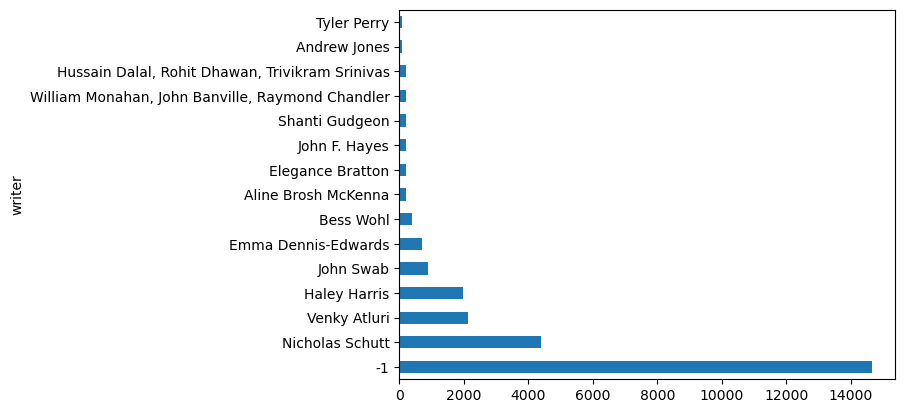

In [10]:
# 标称属性
for field in nom_fields:
    fig_path = 'fig/'+ field + '.png'
    data[field].value_counts().head(15).plot.barh().figure.savefig(fig_path)

IMDb-rating 直方图和Q-Q图:


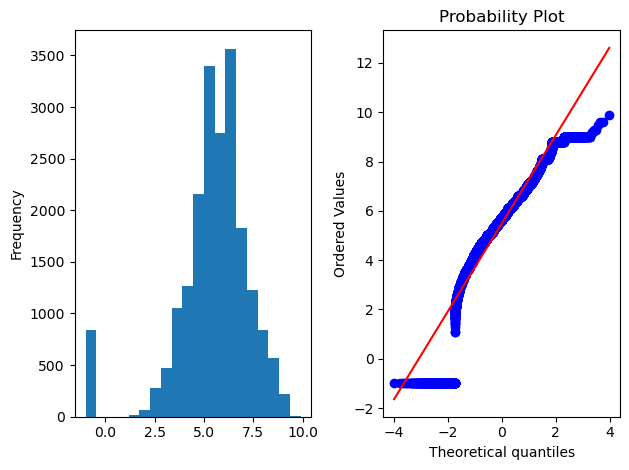

id 直方图和Q-Q图:


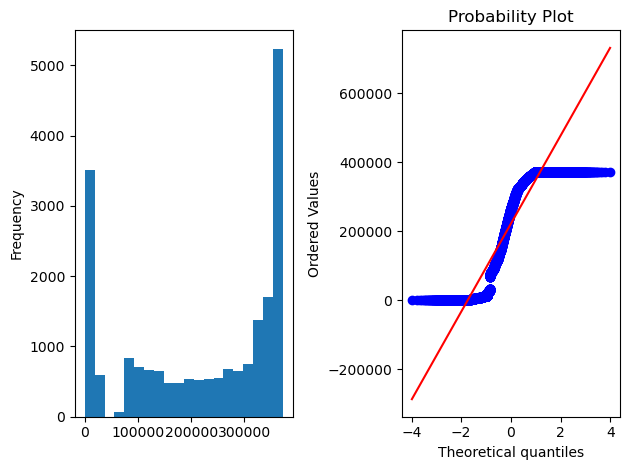

downloads 直方图和Q-Q图:


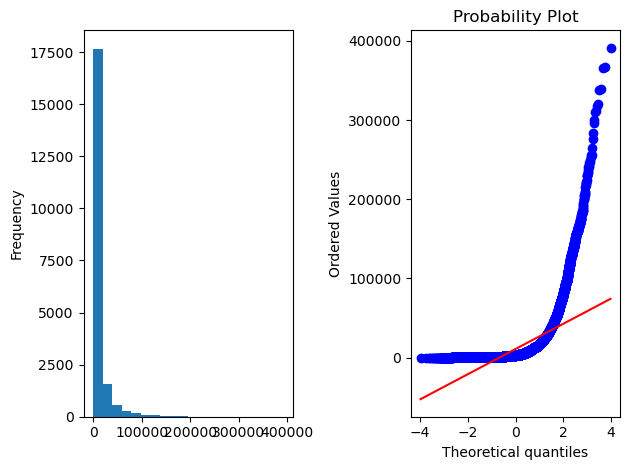

run_time 直方图和Q-Q图:


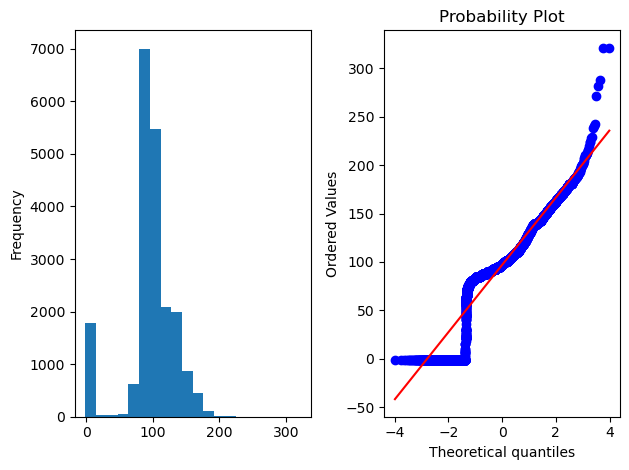

views 直方图和Q-Q图:


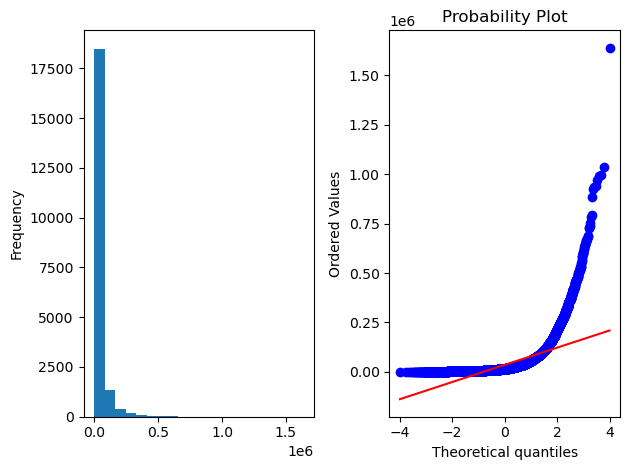

In [11]:
# 数值属性
for field in num_fields:
    print(field, '直方图和Q-Q图:')
    plt.subplot(1, 2, 1)
    data[field].plot.hist(bins=20)
    plt.subplot(1, 2, 2)
    stats.probplot(data[field], plot=plt)
    plt.tight_layout()  # 调整整体空白
    plt.show()

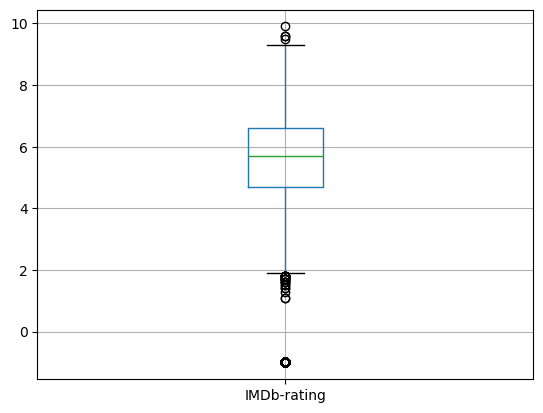

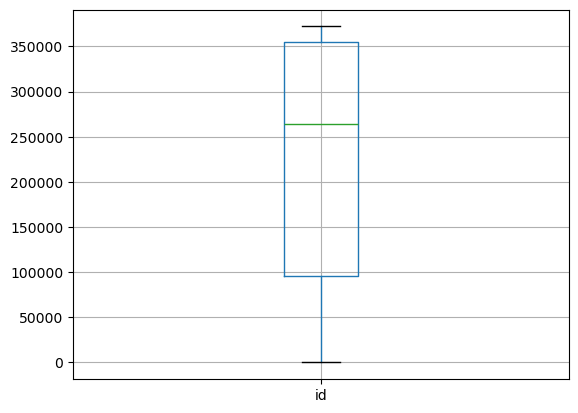

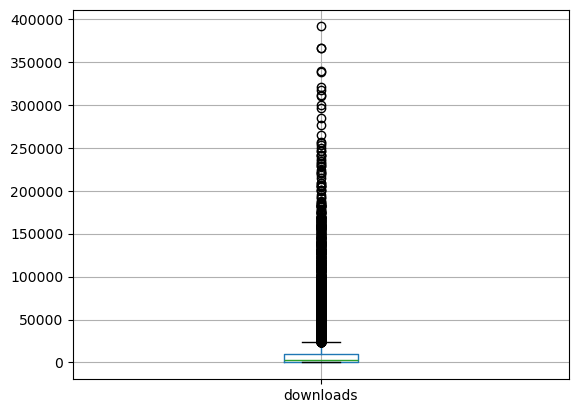

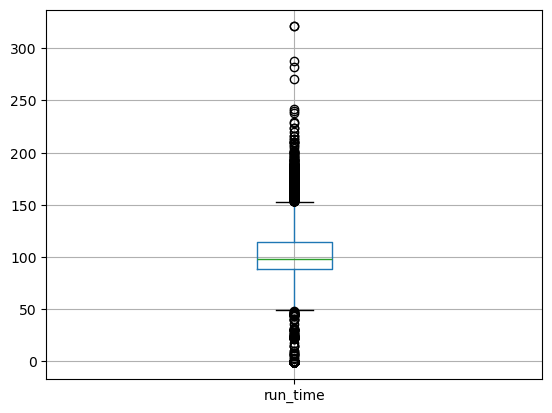

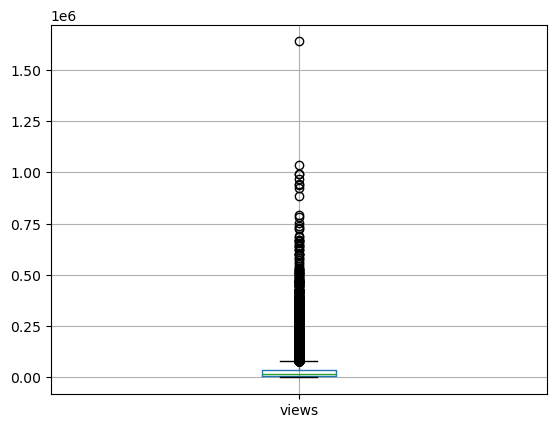

In [12]:
for field in num_fields:
    data.boxplot(field)
    plt.show()

### 4、缺失值处理
#### 首先对缺失值进行统计

In [13]:
# 缺失值处理
data_1 = pd.read_csv('movies_dataset.csv', index_col=0)
missing_data = data_1.isnull().sum()
missing_data = missing_data[missing_data != 0]
print(missing_data)
# 将包含缺失值的整行剔除
print('原始数据行数:', len(data))
drop_data = data_1.dropna(how='any')
print('将缺失部分剔除后数据行数:', len(drop_data))
drop_data.isna().sum()

IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
industry              1
language            546
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64
原始数据行数: 20548
将缺失部分剔除后数据行数: 9902


IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

#### 1）将缺失部分剔除

In [14]:
print('原始数据行数:', len(data))
drop_data = data_1.dropna(how='any')
print('将缺失部分剔除后数据行数:', len(drop_data))
drop_data.isna().sum()

原始数据行数: 20548
将缺失部分剔除后数据行数: 9902


IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

以 id 属性为例，通过盒图对比新旧数据:


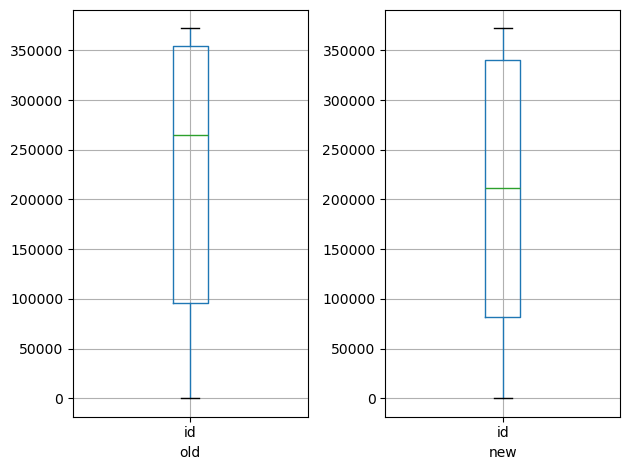

In [15]:
print('以 id 属性为例，通过盒图对比新旧数据:')
field = 'id'
plt.subplot(1, 2, 1)
data_1.boxplot(field)
plt.xlabel('old')
plt.subplot(1, 2, 2)
drop_data.boxplot(field)
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

#### 2）用最高频率值来填补缺失值

以 IMDb-rating 属性为例，通过盒图对比新旧数据:
IMDb-rating 属性的最高频率值为: 6.6


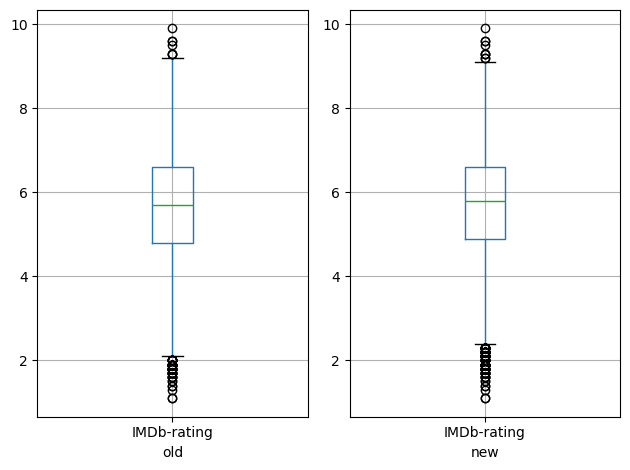

In [16]:
print('以 IMDb-rating 属性为例，通过盒图对比新旧数据:')
field = 'IMDb-rating'
mode = data_1[field].mode()[0]
new_data = data_1.fillna({field: mode})
print(field, '属性的最高频率值为:', mode)

plt.subplot(1, 2, 1)
data_1.boxplot(field)
plt.xlabel('old')
plt.subplot(1, 2, 2)
new_data.boxplot(field)
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

#### 3）通过属性的相关关系来填补缺失值

In [17]:
data[num_fields].corr()

,IMDb-rating,id,downloads,run_time,views
IMDb-rating,1.000000,0.002835,0.091868,0.540525,0.099334
id,0.002835,1.000000,-0.246679,-0.116051,-0.183486
downloads,0.091868,-0.246679,1.000000,0.280649,0.947877
run_time,0.540525,-0.116051,0.280649,1.000000,0.282563
views,0.099334,-0.183486,0.947877,0.282563,1.000000


#### 可以看出downloads和views之前存在正相关关系，利用线性回归模型，通过views值预测downloads值

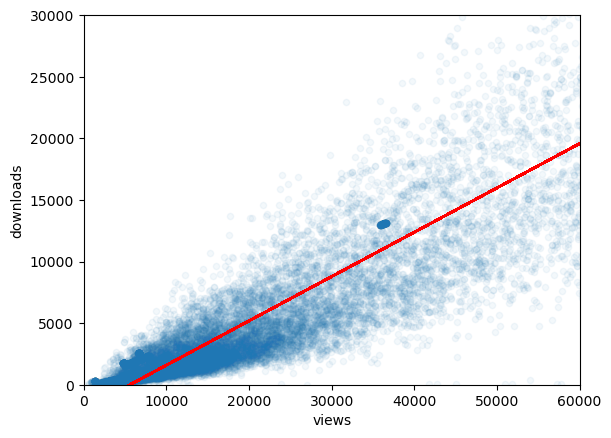

In [18]:
drop_data = data.dropna(subset=['downloads'])
x = drop_data['views']
y = drop_data['downloads']
x = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
drop_data.plot(kind="scatter", x="views", y="downloads", alpha=0.05)
plt.plot(x, model.predict(x), 'r-')
plt.xlim(0, 60000)
plt.ylim(0,30000)
plt.show()

In [19]:
new_data = data_1.copy()
new_data = new_data.dropna(subset=['downloads'])
for index, row in new_data[data_1['downloads'].isna()].iterrows():
    new_data['downloads'][index] = model.predict(np.array(row['views']).reshape(-1, 1))

#### downloads和views缺失值出现在同一行，其他属性对相关性弱

#### 4）通过数据对象之间的相似性来填补缺失值
#### 以填充“IMDb-rating”为例，使用相同“director”的数据对象的“IMDb-rating”均值来填充缺失数据，如果没有相同的“director”，则接下来依次考虑相同的“writer”、“industry”、“downloads”

In [20]:
# 以填充“IMDb-rating”为例，使用相同“director”的数据对象的“IMDb-rating”均值来填充缺失数据，如果没有相同的“director”，
# 则接下来依次考虑相同的“writer”、“industry”、“downloads”
full_data = data_1[data_1['IMDb-rating'].notna()]
new_data = data_1.copy()
consider_fields = ['director','writer','industry','downloads']
for i, row in tqdm(list(new_data[data_1['IMDb-rating'].isna()].iterrows())):
    for field in consider_fields:
        tmp_data = full_data[full_data[field]==row[field]]
        if len(tmp_data) > 0:
            new_data['IMDb-rating'][i] = tmp_data['IMDb-rating'].mean()
            break

100%|██████████| 841/841 [00:01<00:00, 673.47it/s]


In [21]:
data_1[data_1['IMDb-rating'].isna()].head(5)['IMDb-rating']

6    NaN
12   NaN
16   NaN
18   NaN
24   NaN
Name: IMDb-rating, dtype: float64

In [22]:
new_data[data_1['IMDb-rating'].isna()].head(5)['IMDb-rating']

6     6.525000
12    6.525000
16    6.269453
18    6.525000
24    6.050348
Name: IMDb-rating, dtype: float64

#### 可以看出新数据中缺失的“price”值已经通过相似对象的“price”属性的均值进行填充